[Source paper](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://aapm.onlinelibrary.wiley.com/doi/pdfdirect/10.1118/1.3097633?casa_token=ryEnPyIfRDcAAAAA%3AeIj2nZpB0KUSQaCSn1j7T4L9hqnxivzgkT92j6TDlbAn0sRxcMtEHnOtRcKQXpAy_cY0box3MXCcUbFd4w)

In [1]:
import os
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

## import an image and extract an ESF


In [16]:
source_file_name = "../static/compass.tiff"
assert os.path.exists(source_file_name)

In [17]:
data = np.asarray(Image.open(source_file_name))

In [37]:
y_profile = 1300
profile_data = data[y_profile, :]

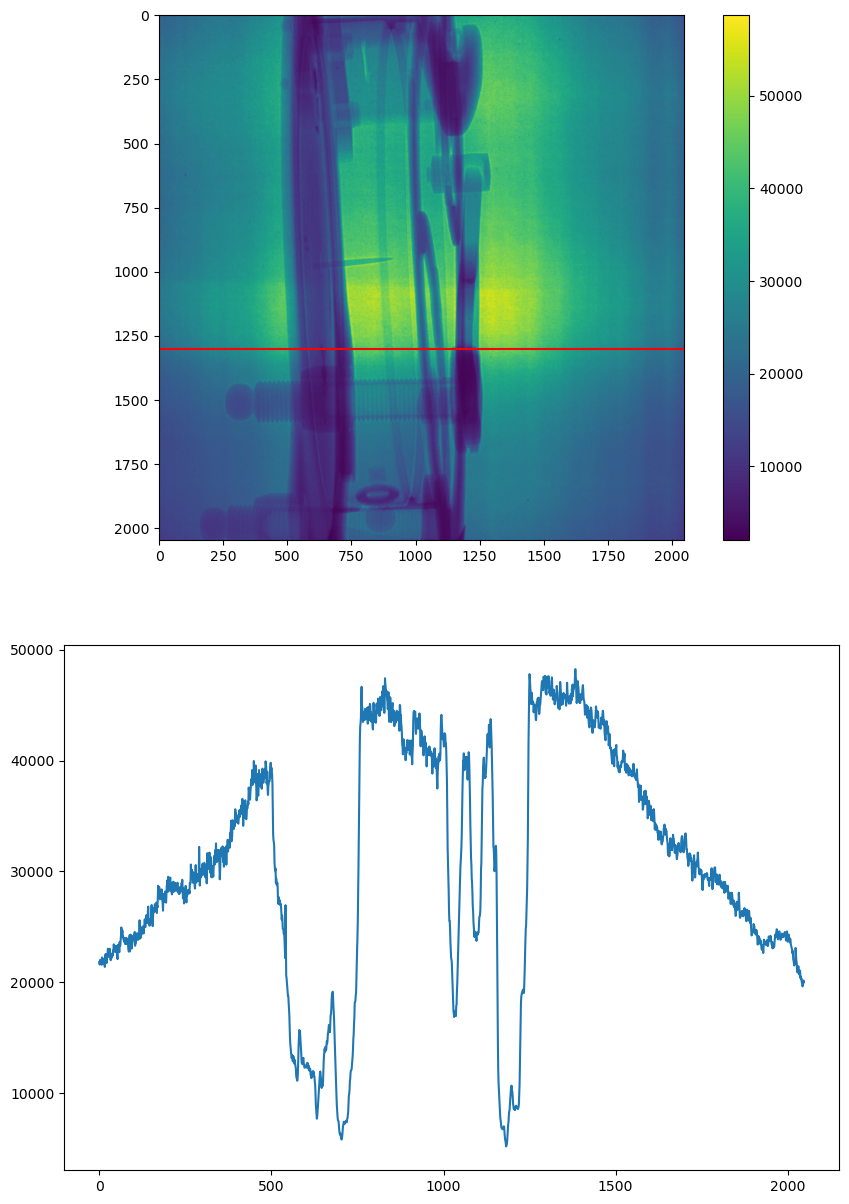

In [39]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,15))

_ax0 = ax[0].imshow(data)
ax[0].axhline(y_profile, color='r')
plt.colorbar(_ax0)

ax[1].plot(profile_data)


## Isolate edge of interest

Text(0.5, 1.0, 'Edge Spread Function')

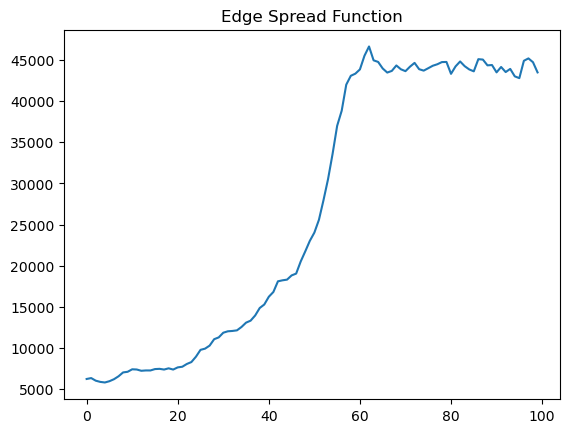

In [47]:
ESF = profile_data[700: 800]
fig, ax = plt.subplots()
ax.plot(ESF)
ax.set_title("Edge Spread Function")

### using np.diff 

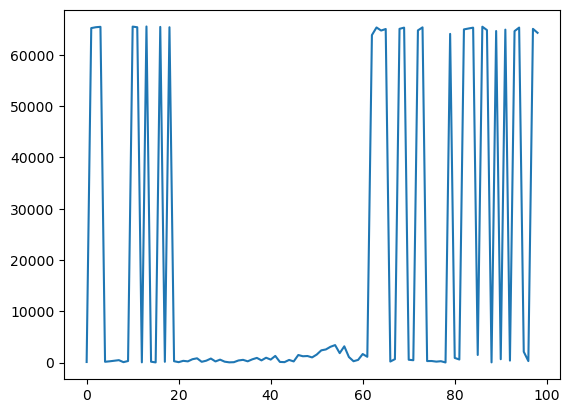

In [55]:
LSF = np.diff(ESF)

fig0, ax0 = plt.subplots()
ax0.plot(LSF)

### using np.fft.ifft 

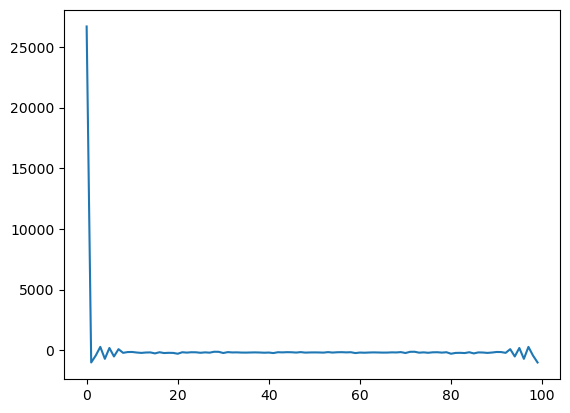

In [56]:
LSF = np.fft.ifft(ESF)

fig1, ax1 = plt.subplots()
ax1.plot(LSF)

### trying to reverse the profile (from max to min) 

Text(0.5, 1.0, 'Edge Spread Function of reverse ESF')

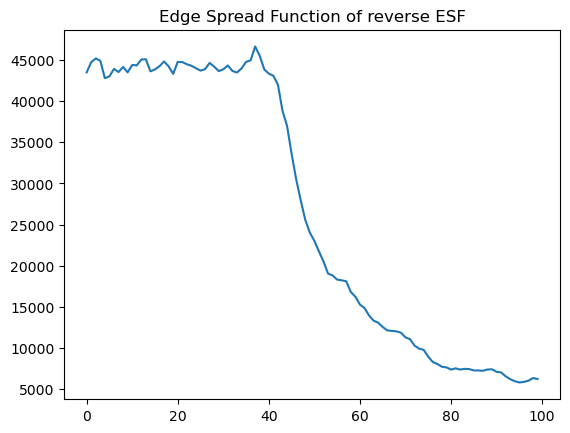

In [52]:
ESF_reversed = ESF[::-1]
fig2, ax2 = plt.subplots()
ax2.plot(ESF_reversed)
ax2.set_title("Edge Spread Function of reverse ESF")

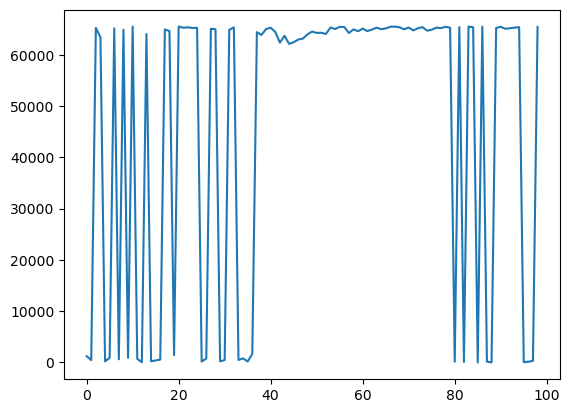

In [53]:
# np.diff

LSF_reversed = np.diff(ESF_reversed)

fig3, ax3 = plt.subplots()
ax3.plot(LSF_reversed)

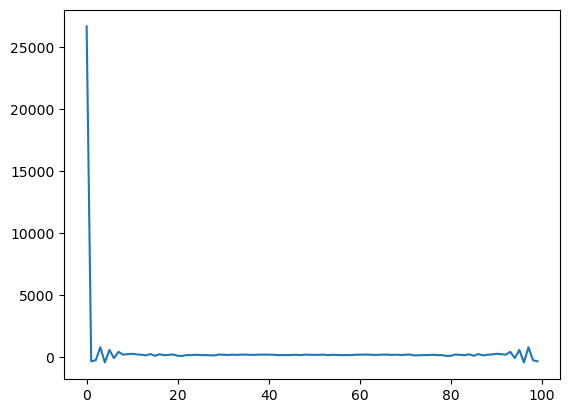

In [62]:
# using np.fft.ifft

LSF_reversed = np.fft.ifft(ESF_reversed)

fig4, ax4 = plt.subplots()
ax4.plot(LSF_reversed)
# ax4.set_xlim((0,5))

### using method described in notebook `edge_spread_function` 

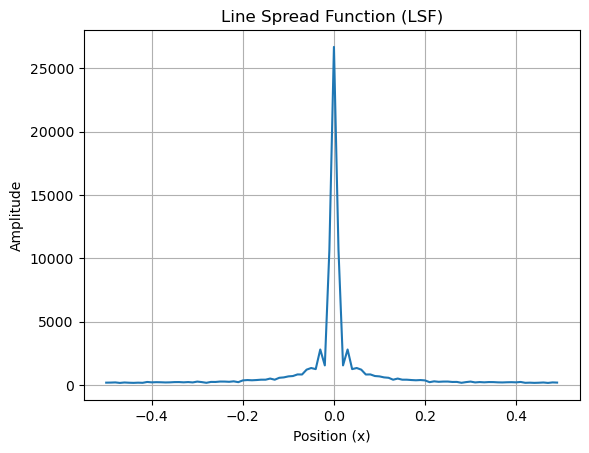

In [65]:
fig5, ax5 = plt.subplots()

ax5.plot(np.fft.fftshift(np.fft.fftfreq(len(LSF))), np.fft.fftshift(np.abs(LSF)))
ax5.set_title('Line Spread Function (LSF)')
ax5.set_xlabel('Position (x)')
ax5.set_ylabel('Amplitude')
ax5.grid(True)


# from chatGPT 

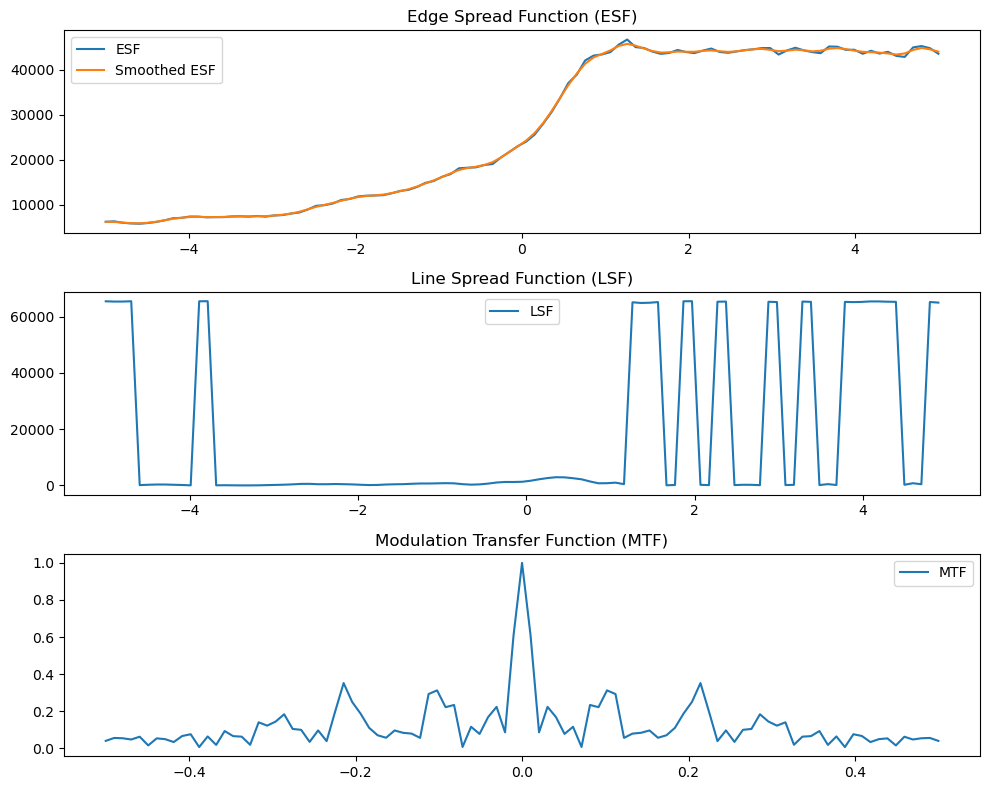

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.fftpack import fft, fftshift

# Sample ESF (replace with actual data)
esf = ESF

# Smooth the ESF
esf_smooth = gaussian_filter1d(esf, sigma=1)

# Calculate the LSF by differentiating the ESF
lsf = np.diff(esf_smooth)

# Calculate the MTF by taking the Fourier transform of the LSF
mtf = np.abs(fftshift(fft(lsf)))

# Normalize MTF
mtf /= np.max(mtf)

# Plot the ESF, LSF, and MTF
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

ax[0].plot(x, esf, label='ESF')
ax[0].plot(x, esf_smooth, label='Smoothed ESF')
ax[0].set_title('Edge Spread Function (ESF)')
ax[0].legend()

ax[1].plot(x[:-1], lsf, label='LSF')
ax[1].set_title('Line Spread Function (LSF)')
ax[1].legend()

ax[2].plot(np.linspace(-0.5, 0.5, len(mtf)), mtf, label='MTF')
ax[2].set_title('Modulation Transfer Function (MTF)')
ax[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
from scipy.optimize import curve_fit

# Define a Gaussian model for MTF
def gaussian_mtf(f, a, b):
    return a * np.exp(-b * f**2)

# Fit the Gaussian model to the MTF data
popt, _ = curve_fit(gaussian_mtf, positive_freqs, mtf_normalized)

# Plot the fitted model
fitted_mtf = gaussian_mtf(positive_freqs, *popt)

plt.plot(positive_freqs, mtf_normalized, 'b-', label='Normalized MTF')
plt.plot(positive_freqs, fitted_mtf, 'r--', label='Fitted Gaussian Model')
plt.title('Fitted Modulation Transfer Function (MTF)')
plt.xlabel('Spatial Frequency')
plt.ylabel('Normalized MTF')
plt.legend()
plt.show()

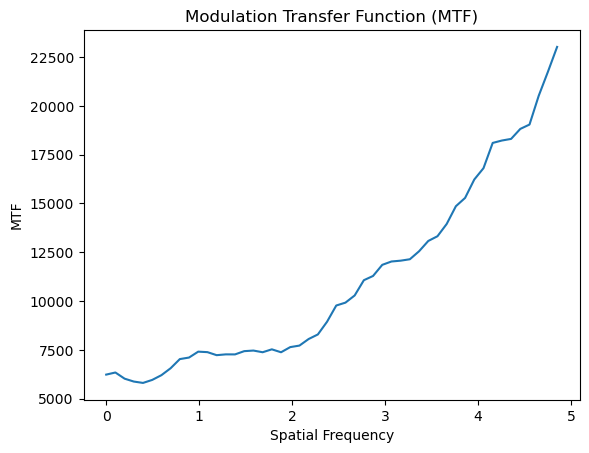

In [72]:
from scipy.fft import fft, fftfreq

# Fourier transform of LSF
lsf_fft = fft(LSF)
mtf = np.abs(lsf_fft)

# Frequency axis
freq = fftfreq(len(x), x[1] - x[0])

# Consider only positive frequencies
positive_freqs = freq[freq >= 0]
positive_mtf = mtf[freq >= 0]

plt.plot(positive_freqs, positive_mtf)
plt.title('Modulation Transfer Function (MTF)')
plt.xlabel('Spatial Frequency')
plt.ylabel('MTF')
plt.show()

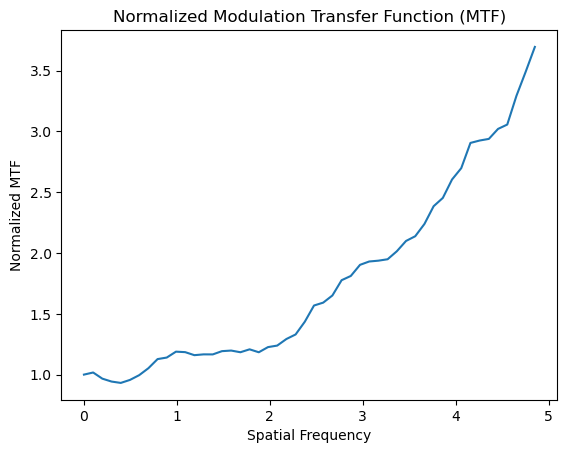

In [73]:
mtf_normalized = positive_mtf / positive_mtf[0]

plt.plot(positive_freqs, mtf_normalized)
plt.title('Normalized Modulation Transfer Function (MTF)')
plt.xlabel('Spatial Frequency')
plt.ylabel('Normalized MTF')
plt.show()

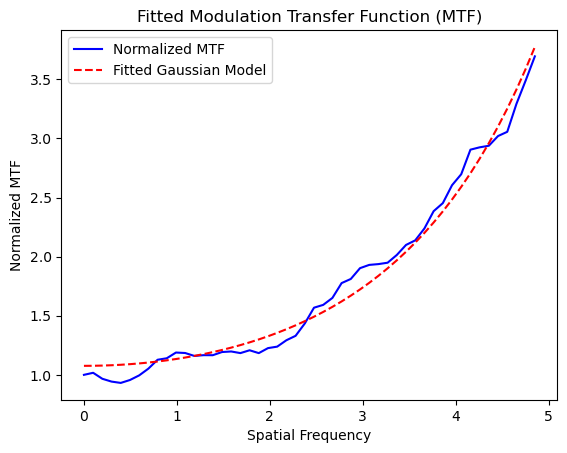

In [76]:
from scipy.optimize import curve_fit

# Define a Gaussian model for MTF
def gaussian_mtf(f, a, b):
    return a * np.exp(-b * f**2)

# Fit the Gaussian model to the MTF data
popt, para = curve_fit(gaussian_mtf, positive_freqs, mtf_normalized)

# Plot the fitted model
fitted_mtf = gaussian_mtf(positive_freqs, *popt)

plt.plot(positive_freqs, mtf_normalized, 'b-', label='Normalized MTF')
plt.plot(positive_freqs, fitted_mtf, 'r--', label='Fitted Gaussian Model')
plt.title('Fitted Modulation Transfer Function (MTF)')
plt.xlabel('Spatial Frequency')
plt.ylabel('Normalized MTF')
plt.legend()
plt.show()

Calculating the FWHM after fitting the MTF and extracting the sigma

In [86]:
fwhm = 2.35482 * np.sqrt(1/(2*np.abs(popt[1])))
print(f"image resolution is then {fwhm:.2f} pixels")

image resolution is then 7.21 pixels
